# Задача 1
Представленный набор данных содержит информацию о принятых предложениях по кредитам в банке Thera-Bank. Основные клиенты банка пользуются банком для того, чтобы разместить в нем свои денежные средства, то есть являются вкладчиками. В то же время, большую прибыль банку приносят кредиторы — люди, берущие в банке кредит. Поэтому банк хочет сформировать для своих вкладчиков выгодные предложения по кредиту. Кампания, проведенная банком для вкладчиков в прошлом году, показала, что коэффициент конверсии составил более `9,6%`.

Это побудило отдел маркетинга разработать кампании с улучшенным целевым маркетингом, чтобы увеличить вероятность успеха при, естественно, минимальном бюджете. Департамент хотел бы разработать классификатор, который поможет им определить потенциальных клиентов, которые с большей вероятностью приобретут кредит. Это повысит вероятность успеха при одновременном снижении стоимости кампании.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/Bank_Personal_Loan_Modelling_train.csv')
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,409,60,36,89,91745,2,2.8,1,0,0,0,0,1,0
1,3738,44,19,30,91423,1,0.5,3,0,0,0,0,1,0
2,3890,26,0,19,93014,1,0.1,2,121,0,0,0,1,0
3,569,34,9,41,92101,2,0.1,1,161,0,0,0,1,1
4,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,4588,37,11,59,94720,4,0.2,3,0,0,0,0,0,0
3996,2342,36,10,91,92028,1,1.5,3,289,0,0,0,1,0
3997,1586,57,31,131,90502,2,2.7,1,0,0,0,0,0,0
3998,3153,40,15,83,90275,1,1.0,3,0,0,0,0,0,0


**1. Разведочный анализ данных**

Удалите колонку `ID`, она нам не понадобится. Постройте матрицу корреляций (рекомендуем использовать `sns.heatmap(df.corr())`).

*Перечислите через запятую и пробел пару наиболее коррелированных переменных.*

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994134,-0.047440,-0.030978,-0.033864,-0.040827,0.027489,-0.003468,-0.018537,0.000950,0.013890,0.027305,0.014137
Experience,0.994134,1.000000,-0.037976,-0.029845,-0.040127,-0.038459,-0.001394,-0.000700,-0.018108,0.000239,0.016445,0.026962,0.015945
Income,-0.047440,-0.037976,1.000000,-0.015647,-0.156319,0.641660,-0.192029,0.197115,0.497333,0.005082,0.179584,0.013222,0.008567
ZIP Code,-0.030978,-0.029845,-0.015647,1.000000,0.006110,-0.003104,-0.019697,0.003173,-0.007605,-0.000667,0.008082,0.008478,0.001413
Family,-0.033864,-0.040127,-0.156319,0.006110,1.000000,-0.103654,0.070498,-0.024184,0.063050,0.011535,0.019090,0.011682,0.010254
CCAvg,-0.040827,-0.038459,0.641660,-0.003104,-0.103654,1.000000,-0.133361,0.104529,0.365553,0.028449,0.145242,-0.003718,0.004311
Education,0.027489,-0.001394,-0.192029,-0.019697,0.070498,-0.133361,1.000000,-0.028436,0.134556,-0.013329,0.012545,-0.018219,-0.015894
Mortgage,-0.003468,-0.000700,0.197115,0.003173,-0.024184,0.104529,-0.028436,1.000000,0.140203,-0.002341,0.093418,0.007982,-0.002726
Personal Loan,-0.018537,-0.018108,0.497333,-0.007605,0.063050,0.365553,0.134556,0.140203,1.000000,0.030758,0.336931,0.010362,0.010184
Securities Account,0.000950,0.000239,0.005082,-0.000667,0.011535,0.028449,-0.013329,-0.002341,0.030758,1.000000,0.325264,0.014732,-0.021373


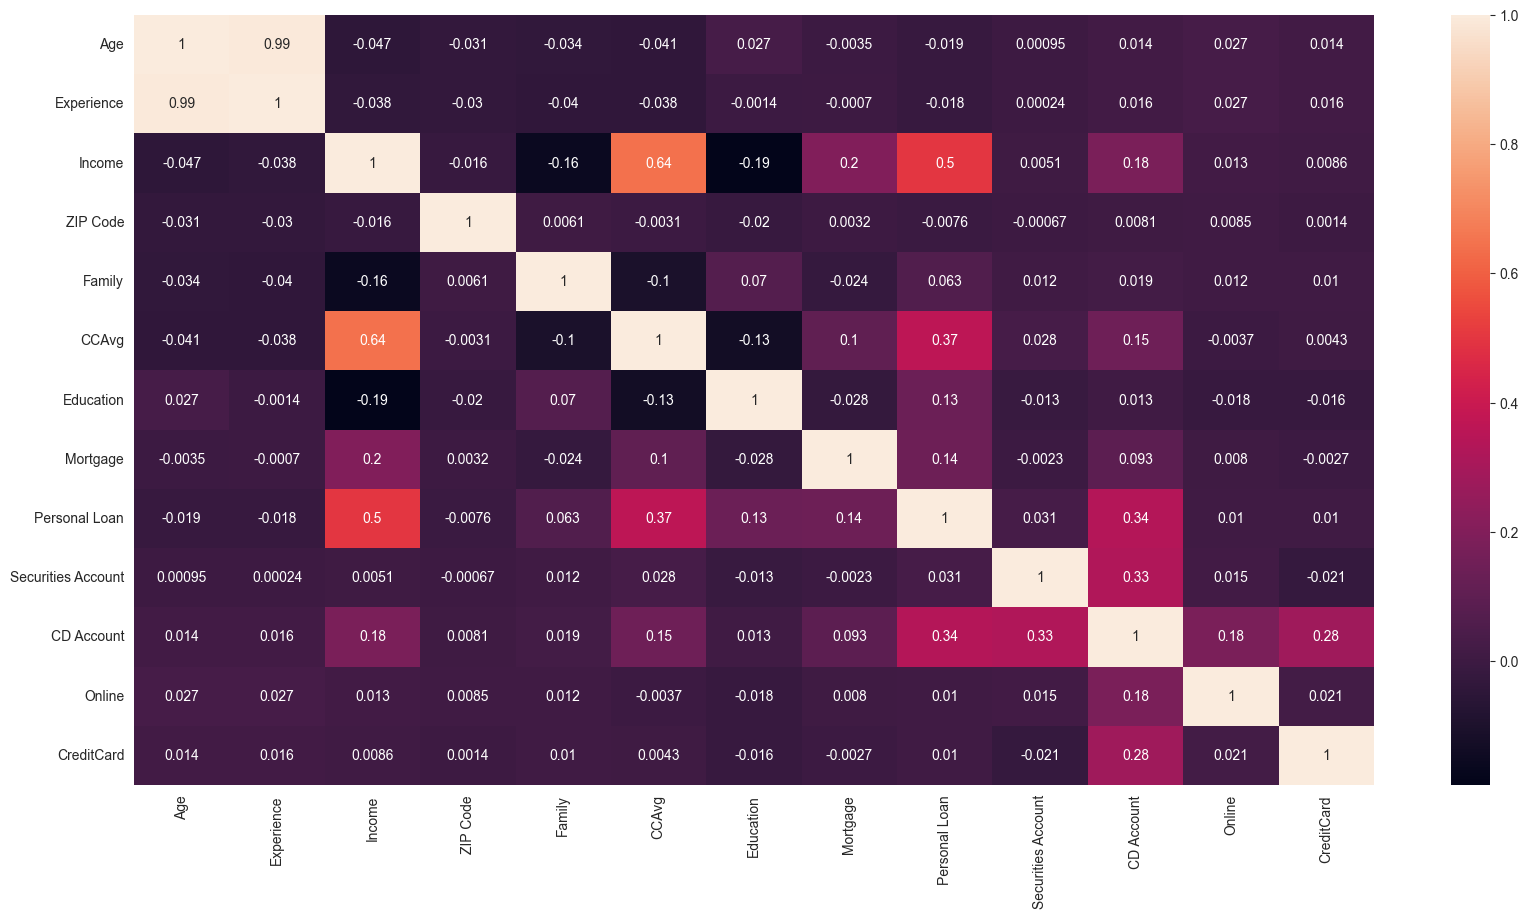

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
data.drop("ID", axis=1, inplace=True)
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True)
data.corr()

Определите признак, который меньше всего коррелирует (можно считать почти не коррелирует) с остальными признаками (в том числе с откликом). Удалите этот признак из рассмотрения.

*Введите название удаленного признака.*

In [5]:
min_corr_x = data.corr().abs().mean().sort_values().idxmin()
data.drop(min_corr_x, axis=1, inplace=True)
print(min_corr_x)

ZIP Code


**2. Предварительная подготовка данных**

Модификация признаков

Стоит разобраться с полем `Experience`. Видно, что опыт коррелирует с возрастом. Однако, в поле `Experience` присутствуют отрицательные значения. Имеет смысл «сдвинуть» значения в этой колонке. Добавьте ко всем значениям колонки `Experience` одно и то же число так, чтобы минимальное значение было равно `0`.

*Вычислите выборочное среднее колонки `Experience` после преобразования.*

In [6]:
data['Experience'] -= data['Experience'].min()
round(data['Experience'].mean(), 3)

23.196

Аналогично имеет смысл модифицировать поле `CCAvg`. Раз рассматривается годовой доход, то и значение трат стоит рассматривать за целый год.

Вычислите выборочное среднее колонки `CCAvg` после преобразования.

In [7]:
data["CCAvg"] = data["CCAvg"] * 12
round(data['CCAvg'].mean(), 3)

23.062

**Определение выбросов**

Постройте ящики с усами для всех предикторов. Рекомендуем использовать `sns.boxplot()`. *Определите признак по следующему изображению `boxplot`.*

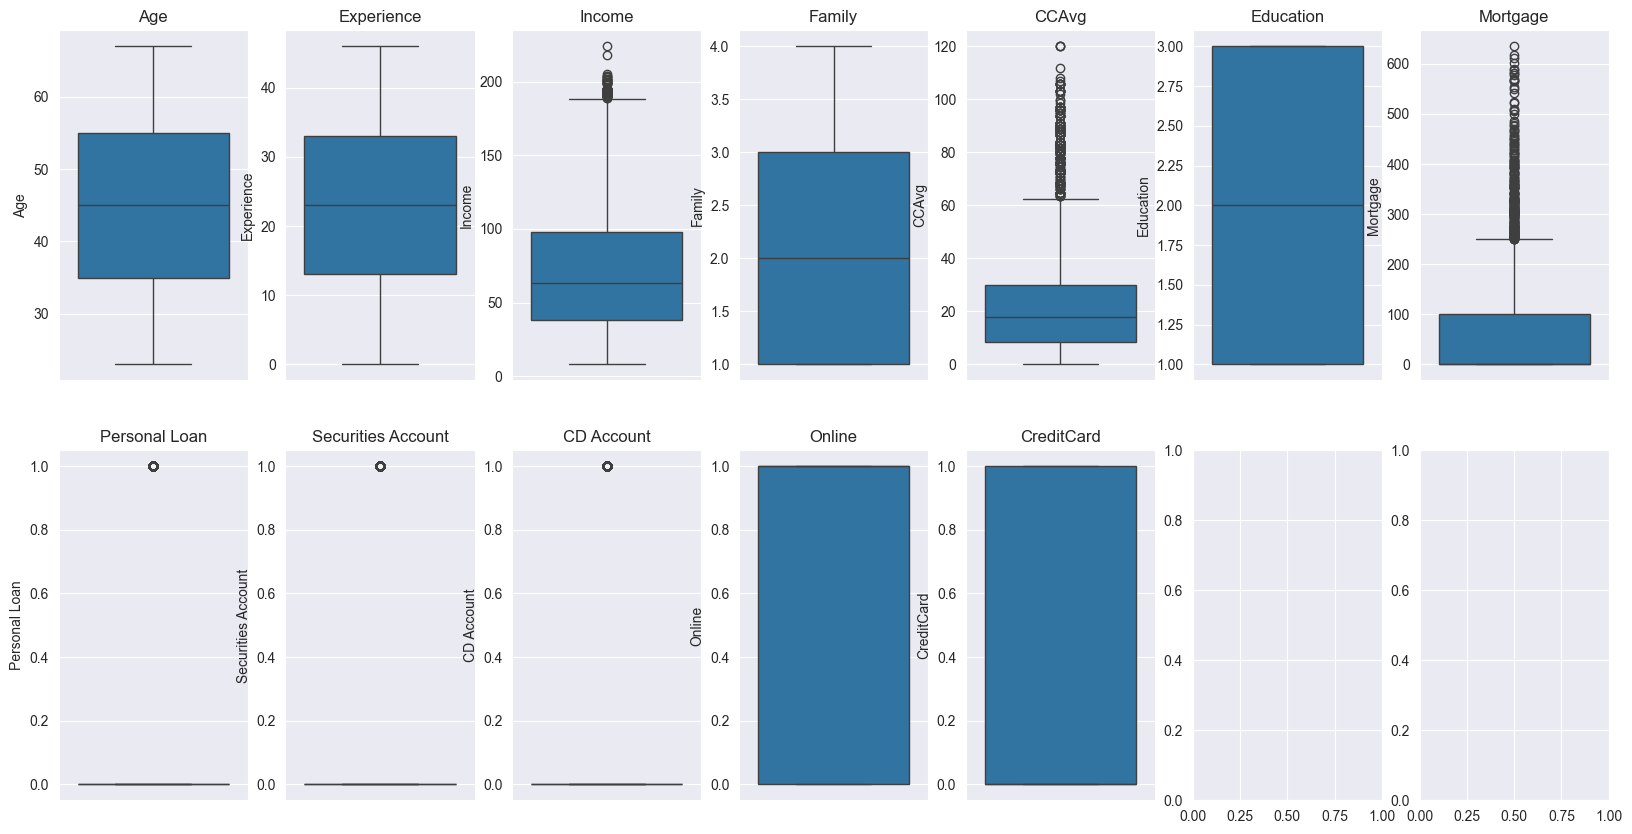

In [8]:
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats  

blowouts = {}

fig, ax = plt.subplots(2, 7, figsize=(20, 10))
for axi, label in zip(ax.flat, data.columns):
    sns.boxplot(data[label], ax=axi).set_title(label)
    blowouts[label] = boxplot_stats(data[label]).pop(0)['fliers']

Определите признак, содержащий наибольшее число выбросов.

*Введите название признака.*

In [9]:
for k, v in blowouts.items():
    print(k, len(v))

Age 0
Experience 0
Income 70
Family 0
CCAvg 255
Education 0
Mortgage 233
Personal Loan 384
Securities Account 416
CD Account 246
Online 0
CreditCard 0


P.S. Авторы долбоёбы поэтому самое большое число выбросов не всегда верный ответ

In [10]:
from scipy import stats
z = stats.zscore(data)
errors =  pd.DataFrame(np.where(np.abs(z) > 3, 1, 0), columns=data.columns)
errors.sum()

Age                     0
Experience              0
Income                  2
Family                  0
CCAvg                  93
Education               0
Mortgage               83
Personal Loan         384
Securities Account      0
CD Account            246
Online                  0
CreditCard              0
dtype: int64

Имеет смысл поработать с этим признаком. Для этого можно руководствоваться следующими статистическими соображениями. Если вычесть из данных выборочное среднее, а после поделить на среднеквадратическое отклонение, то, пользуясь правилом `3-sigma` в предположении нормальности распределения (около `99.7%` значений случайной величины, имеющей нормальное распределение с параметрами `a`, `sigma^2`, содержатся в отрезке `[a-3*sigma, a+3*sigma]`), можно выбросить слишком далекие от нуля хвосты.

Постройте гистограмму распределения значений в рамках этого признака (рекомендуем использовать `sns.histplot()`).

Очевидно, среди значений этого признака есть небольшое количество значений, которые лежат далеко «от тенденции». Можно использовать `z-score` функцию из библиотеки `scipy`.

Определите число элементов, модуль `z-score` которых больше `3`.

In [11]:
errors["Mortgage"].sum()

83

Итак, выбросов не очень много, поэтому их можно просто выбросить из рассматриваемого набора данных.

*Введите оставшееся в датасете число строк.*

In [12]:
data = data.drop(*np.where(errors["Mortgage"] == 1))
len(data)

3917

**3. Построение моделей**

Базовый алгоритм

При помощи `train_test_split()` разбейте набор данных на обучающую и тестовую выборки с параметрами `test_size=0.2`, `random_state=17`. Используйте стратификацию по колонке `Personal Loan`. Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных со следующими параметрами: `random_state=17`, `criterion='gini'`. Оцените модель на тестовых данных.

*Вычислите `f1_score()` модели на тестовых данных.*

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop("Personal Loan", axis=1), data["Personal Loan"], test_size=0.2, random_state=17, stratify=data["Personal Loan"])

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
model = DecisionTreeClassifier(random_state=17, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3))                           

0.884


Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных со следующими параметрами: `random_state=17, criterion='entropy'`. Оцените модель на тестовых данных.

*Вычислите `f1_score()` модели на тестовых данных.*

In [15]:

model = DecisionTreeClassifier(random_state=17, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3))        

0.901


**Учет дисбаланса соотношения классов**

Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных со следующими параметрами: `random_state=17, criterion='gini', class_weight='balanced'`. Оцените модель на тестовых данных.

*Вычислите `f1_score()` модели на тестовых данных.*

In [16]:
model = DecisionTreeClassifier(random_state=17, criterion='gini', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3))    

0.944


Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных со следующими параметрами: `random_state=17, criterion='entropy', class_weight='balanced'`. Оцените модель на тестовых данных.

Вычислите `f1_score()` модели на тестовых данных.

In [17]:
model = DecisionTreeClassifier(random_state=17, criterion='entropy', class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3))    

0.951


**Upsampling обучающей выборки**

Постройте гистограмму распределения объектов по классам для обучающей выборки.

*Определите долю элементов класса `0` тренировочного набора данных.*

In [18]:
round((len(y_test) - y_test.sum()) / len(y_test), 3)

0.911

Используя класс `SMOTE` из модуля `imblearn.over_sampling` сбалансируйте обучающую выборку со следующими параметрами:`random_state=17`. Убедитесь, что теперь в выборке содержится одинаковое число представителей обоих классов.

*Введите количество объектов класса `1` обучающей выборки после `upsampling'а`.*

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=17)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [20]:
len(y_train) / 2

2855.0

Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных после `upsampling'а` со следующими параметрами: `random_state=17, criterion='gini'`. Оцените модель на тестовых данных.

*Вычислите `f1_score()` модели на тестовых данных.*

In [21]:
model = DecisionTreeClassifier(random_state=17, criterion='gini')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3))    

0.81


Обучите модель `DecisionTreeClassifier()` на тренировочном наборе данных после `upsampling'а` со следующими параметрами: `random_state=17, criterion='entropy'`. Оцените модель на тестовых данных.

*Вычислите `f1_score()` модели на тестовых данных.*

In [22]:
model = DecisionTreeClassifier(random_state=17, criterion='entropy')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(round(f1_score(y_test, y_pred), 3)) 

0.838


In [23]:
y_test = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [24]:
y_test_2 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [25]:
# на 0.94схуем
y_test_3 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]



In [26]:
# 0.948979591837
y_test_4 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]



# Задача 2
Используя весь датасет из предыдущего задания как обучающий, выполните предсказания для следующего набора данных. Для успешного выполнения задания необходимо, чтобы ваш результат превысил пороговое значение, равное `0.95`. В качестве метрики используется `f1_score()`.

Предсказания вводить в виде списка, например: [0,1,0,0].

In [27]:
data = pd.read_csv('data/Bank_Personal_Loan_Modelling_train.csv')

corr_values = data.corr().abs().mean().sort_values()
corr_values

ZIP Code              0.082776
ID                    0.087022
Online                0.095979
CreditCard            0.102021
Securities Account    0.105655
Family                0.111300
Mortgage              0.116070
Education             0.119918
Experience            0.159635
Age                   0.162032
CD Account            0.187392
CCAvg                 0.188006
Personal Loan         0.190416
Income                0.214713
dtype: float64

In [28]:
z = stats.zscore(data)
errors =  pd.DataFrame(np.where(np.abs(z) > 3, 1, 0), columns=data.columns)
errors.sum()

ID                      0
Age                     0
Experience              0
Income                  2
ZIP Code                1
Family                  0
CCAvg                  93
Education               0
Mortgage               83
Personal Loan         384
Securities Account      0
CD Account            246
Online                  0
CreditCard              0
dtype: int64

In [29]:
data = data.drop(*np.where((errors["Mortgage"] == 1) | (errors["CCAvg"] == 1)))

In [94]:
def transform_data(d):
    for i in range(0, 3):
        d.drop(corr_values.index[i], axis=1, inplace=True)
    d['Experience'] -= d['Experience'].min()
    d["CCAvg"] = d["CCAvg"] * 12

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
X_train = data.drop('Personal Loan', axis=1)
y_train = data['Personal Loan']
transform_data(X_train)
X_test = pd.read_csv('data/Bank_Personal_Loan_Modelling_reserved.csv')
transform_data(X_test)
params_grid = {'n_estimators': [100,300,500], 
               'max_leaf_nodes': list(range(6,10)), 
               'min_samples_leaf': [1,2,3]}
grid = GridSearchCV(RandomForestClassifier(bootstrap=False, class_weight='balanced', n_jobs=-1, max_features='sqrt', random_state=11), params_grid, verbose=4, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.895 total time=   0.2s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.962 total time=   0.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.952 total time=   0.2s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.894 total time=   0.4s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.917 total time=   0.5s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.900 total time=   0.5s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.889 total time=   0.8s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.914 total time=   1.0s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.900 total time=   0.7s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=11),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

In [106]:
X_train = data.drop('Personal Loan', axis=1)
y_train = data['Personal Loan']
transform_data(X_train)
X_test = pd.read_csv('data/Bank_Personal_Loan_Modelling_reserved.csv')
transform_data(X_test)
params_grid = {'criterion': ["gini", "entropy", "log_loss"], 
               'class_weight': ["balanced", None], 
               'splitter': ["best", "random"],
               'max_features': ["sqrt", "log2", None]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=17), params_grid, verbose=4, cv=3)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=best;, score=0.973 total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=best;, score=0.970 total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=best;, score=0.962 total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=random;, score=0.954 total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=random;, score=0.966 total time=   0.0s
[CV 3/3] END class_weight=balanced, criterion=gini, max_features=sqrt, splitter=random;, score=0.967 total time=   0.0s
[CV 1/3] END class_weight=balanced, criterion=gini, max_features=log2, splitter=best;, score=0.973 total time=   0.0s
[CV 2/3] END class_weight=balanced, criterion=gini, max_features=log2, splitter=best;, score=0.970 total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=4)

In [113]:
# model = DecisionTreeClassifier(random_state=17, criterion='gini', class_weight='balanced')
model = RandomForestClassifier(random_state=17, **grid.best_params_)
# model = DecisionTreeClassifier(random_state=17, **grid.best_params_)
X_train, X_test, y_train, y_test = train_test_split(data.drop("Personal Loan", axis=1), data["Personal Loan"], test_size=0.2, random_state=17, stratify=data["Personal Loan"])
transform_data(X_train)
transform_data(X_test)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(round(f1_score(y_test, y_pred), 3))    


0.731


In [114]:
X_train = data.drop('Personal Loan', axis=1)
y_train = data['Personal Loan']
transform_data(X_train)
X_test = pd.read_csv('data/Bank_Personal_Loan_Modelling_reserved.csv')
transform_data(X_test)

model.fit(X_train, y_train)
y_pred = model.predict(X_train)

# print(round(f1_score(y_train, y_pred), 3))   

y_pred = model.predict(X_test)
print(round(f1_score(y_test_4, y_pred), 3))    
print(list(y_pred)) 

0.788
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 